# Project: The Power of Proper Sanitation Infrastructure

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I picked the Gapminder data set for the analysis. I’ve learned that one of the major initiatives for the Gates Foundation is to improve sanitation. The reason for improving sanitation is that poor sanitation is often linked with poverty and infectious diseases. The independent variable in the analysis is the percent of the population that have access to proper sanitation infrastructure. The other dependent indicators will be the Human Development Index (HDI), income per capita, life expectancy in years, mean years of school for men and women, and the percent of population who have access to water infrastructure. 

The questions that will lead the data analysis are: 
1. What is the global trend of proper sanitation infrastructure from 2000 - 2015?
2. Which one of the other indicators in this analysis are most correlated with percent access to sanitation in 2000 vs. 2015?
3. What is the relationship between the number of years of school for men vs women and the level of sanitation in a country?

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data will be imported, checked for cleanliness, and prepared for the analysis.

### General Properties

The data set consists of 7 indicators related to the development of countries. These are downloaded from <a href="https://www.gapminder.org/data/">Gapminder</a>. The 7 individual csv files are imported and assessed for cleaning. The data for each indicator has different amount of completeness both in terms of data for all countries and data for all years. The goal is to have one dataframe with the year, country and indicators as the columns.

In [2]:
# Load 7 csv files
sanitation_df = pd.read_csv('at_least_basic_sanitation_overall_access_percent.csv')
water_df = pd.read_csv('at_least_basic_water_source_overall_access_percent.csv')
hdi_df = pd.read_csv('hdi_human_development_index.csv')
income_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
life_df= pd.read_csv('life_expectancy_years.csv')
schoolm_df= pd.read_csv('mean_years_in_school_men_25_to_34_years.csv')
schoolw_df= pd.read_csv('mean_years_in_school_women_25_to_34_years.csv')

Print each of the 7 csv files and check the information for each data set.

In [3]:
sanitation_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,23.9,23.9,25.0,26.0,27.1,28.1,29.2,30.3,31.4,32.5,33.6,34.7,35.8,36.9,38.1,39.2
1,Albania,88.3,89.1,89.9,90.7,91.4,92.2,92.9,93.6,94.3,94.9,95.6,96.2,96.8,97.3,97.7,97.7
2,Algeria,83.7,84.1,84.4,84.7,85.0,85.3,85.6,85.8,86.1,86.3,86.6,86.8,87.0,87.2,87.3,87.5
3,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,Angola,20.5,21.7,23.0,24.2,25.5,26.7,28.0,29.3,30.5,31.8,33.1,34.3,35.6,36.9,38.2,39.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,87.3,88.0,88.6,89.2,89.7,90.3,90.9,91.5,92.1,92.6,93.2,93.8,94.3,94.9,94.9,94.9
190,Vietnam,53.4,55.1,56.9,58.6,60.3,62.0,63.7,65.4,67.0,68.7,70.3,71.9,73.5,75.1,76.7,78.2
191,Yemen,41.2,41.5,41.8,43.3,44.7,46.1,47.5,48.9,50.2,51.6,53.0,54.3,55.7,57.0,58.4,59.7
192,Zambia,26.0,26.3,26.6,27.0,27.4,27.7,28.1,28.4,28.8,29.1,29.5,29.8,30.1,30.5,30.8,31.1


In [4]:
sanitation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  194 non-null    object 
 1   2000     183 non-null    float64
 2   2001     185 non-null    float64
 3   2002     188 non-null    float64
 4   2003     188 non-null    float64
 5   2004     188 non-null    float64
 6   2005     188 non-null    float64
 7   2006     192 non-null    float64
 8   2007     193 non-null    float64
 9   2008     193 non-null    float64
 10  2009     193 non-null    float64
 11  2010     193 non-null    float64
 12  2011     194 non-null    float64
 13  2012     194 non-null    float64
 14  2013     194 non-null    float64
 15  2014     193 non-null    float64
 16  2015     192 non-null    float64
dtypes: float64(16), object(1)
memory usage: 25.9+ KB


In [5]:
water_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,27.1,27.2,29.7,32.2,34.7,37.3,39.8,42.4,44.9,47.5,50.0,52.6,55.2,57.8,60.4,63.0
1,Albania,87.6,87.7,87.7,87.8,87.8,87.9,88.0,88.0,88.0,88.1,88.1,88.1,88.2,89.8,91.4,91.4
2,Algeria,89.8,90.1,90.4,90.7,90.9,91.2,91.4,91.7,91.9,92.2,92.4,92.6,92.8,93.1,93.3,93.5
3,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,Angola,37.8,38.1,38.4,38.6,38.8,39.0,39.2,39.4,39.6,39.9,40.1,40.3,40.5,40.6,40.8,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,96.1,96.2,96.3,96.4,96.5,96.6,96.7,96.8,96.9,97.0,97.1,97.2,97.3,97.4,97.4,97.4
190,Vietnam,77.9,78.6,79.5,80.4,81.3,82.2,83.1,84.0,84.9,85.7,86.6,87.4,88.2,89.1,89.9,91.2
191,Yemen,42.7,43.0,43.2,45.4,47.6,49.8,52.0,54.1,56.2,58.3,60.4,62.4,64.4,66.4,68.4,70.4
192,Zambia,48.6,49.3,50.2,51.1,52.0,52.9,53.7,54.6,55.4,56.3,57.1,57.9,58.8,59.6,60.4,61.2


In [6]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  194 non-null    object 
 1   2000     183 non-null    float64
 2   2001     186 non-null    float64
 3   2002     188 non-null    float64
 4   2003     188 non-null    float64
 5   2004     188 non-null    float64
 6   2005     190 non-null    float64
 7   2006     191 non-null    float64
 8   2007     192 non-null    float64
 9   2008     192 non-null    float64
 10  2009     192 non-null    float64
 11  2010     193 non-null    float64
 12  2011     194 non-null    float64
 13  2012     194 non-null    float64
 14  2013     193 non-null    float64
 15  2014     192 non-null    float64
 16  2015     192 non-null    float64
dtypes: float64(16), object(1)
memory usage: 25.9+ KB


In [7]:
hdi_df

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,0.634,0.644,0.650,0.653,0.654,0.658,0.660,0.664,0.667,...,0.728,0.745,0.754,0.754,0.756,0.767,0.770,0.771,0.769,0.767
183,Vietnam,0.477,0.486,0.498,0.508,0.519,0.531,0.542,0.542,0.562,...,0.625,0.633,0.641,0.647,0.655,0.662,0.668,0.675,0.678,0.683
184,Yemen,0.405,0.408,0.412,0.414,0.418,0.421,0.424,0.428,0.432,...,0.477,0.480,0.483,0.488,0.493,0.494,0.498,0.500,0.499,0.482
185,Zambia,0.398,0.396,0.397,0.402,0.401,0.405,0.408,0.411,0.413,...,0.492,0.504,0.518,0.533,0.543,0.554,0.565,0.570,0.576,0.579


In [8]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   1990     143 non-null    float64
 2   1991     143 non-null    float64
 3   1992     143 non-null    float64
 4   1993     143 non-null    float64
 5   1994     143 non-null    float64
 6   1995     147 non-null    float64
 7   1996     147 non-null    float64
 8   1997     147 non-null    float64
 9   1998     147 non-null    float64
 10  1999     150 non-null    float64
 11  2000     167 non-null    float64
 12  2001     167 non-null    float64
 13  2002     167 non-null    float64
 14  2003     169 non-null    float64
 15  2004     172 non-null    float64
 16  2005     181 non-null    float64
 17  2006     181 non-null    float64
 18  2007     181 non-null    float64
 19  2008     181 non-null    float64
 20  2009     181 non-null    float64
 21  2010     187 non

In [9]:
income_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,1210,1200,1200,1190,1190,1180,1170,1170,1160,...,8270,8420,8580,8760,8930,9110,9300,9490,9680,9880
189,Vietnam,778,778,778,778,778,778,778,778,778,...,11900,12200,12500,12700,13000,13300,13500,13800,14100,14400
190,Yemen,877,879,882,884,887,889,892,894,897,...,3230,3290,3360,3430,3500,3570,3640,3720,3790,3870
191,Zambia,663,665,667,668,670,671,673,675,676,...,3500,3560,3630,3700,3780,3860,3930,4010,4100,4180


In [10]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [11]:
life_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,...,86.2,86.3,86.5,86.6,86.7,86.9,87.0,87.1,87.2,87.3
183,Vietnam,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,84.3,84.4,84.5,84.6,84.7,84.8,84.9,85.0,85.2,85.3
184,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,77.3,77.4,77.5,77.7,77.8,77.9,78.0,78.2,78.3,78.4
185,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,76.8,77.0,77.1,77.3,77.4,77.6,77.7,77.8,78.0,78.1


In [12]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 441.3+ KB


In [13]:
schoolm_df

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1.36,1.39,1.43,1.47,1.51,1.55,1.59,1.63,1.67,...,3.35,3.43,3.51,3.59,3.68,3.76,3.85,3.94,4.04,4.13
1,Albania,6.10,6.22,6.34,6.46,6.58,6.70,6.83,6.95,7.08,...,10.80,10.90,11.00,11.20,11.30,11.40,11.60,11.70,11.80,12.00
2,Algeria,2.60,2.68,2.76,2.84,2.93,3.02,3.11,3.20,3.30,...,7.25,7.39,7.53,7.67,7.81,7.95,8.09,8.24,8.38,8.52
3,Andorra,8.35,8.48,8.62,8.76,8.90,9.04,9.17,9.31,9.45,...,13.30,13.40,13.50,13.60,13.70,13.90,14.00,14.10,14.20,14.30
4,Angola,2.77,2.84,2.91,2.98,3.05,3.12,3.20,3.27,3.35,...,6.12,6.24,6.36,6.48,6.61,6.73,6.86,6.98,7.11,7.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,4.94,5.04,5.15,5.26,5.37,5.48,5.59,5.70,5.82,...,9.29,9.43,9.56,9.70,9.84,9.97,10.10,10.20,10.40,10.50
183,Vietnam,4.52,4.61,4.71,4.82,4.92,5.02,5.13,5.23,5.34,...,8.51,8.64,8.77,8.89,9.02,9.16,9.29,9.42,9.56,9.69
184,Yemen,2.24,2.30,2.37,2.44,2.51,2.58,2.66,2.74,2.82,...,6.46,6.61,6.77,6.92,7.07,7.22,7.37,7.51,7.66,7.80
185,Zambia,3.97,4.06,4.16,4.26,4.36,4.46,4.56,4.67,4.78,...,7.99,8.11,8.23,8.35,8.47,8.60,8.72,8.85,8.98,9.11


In [14]:
schoolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   1970     187 non-null    float64
 2   1971     187 non-null    float64
 3   1972     187 non-null    float64
 4   1973     187 non-null    float64
 5   1974     187 non-null    float64
 6   1975     187 non-null    float64
 7   1976     187 non-null    float64
 8   1977     187 non-null    float64
 9   1978     187 non-null    float64
 10  1979     187 non-null    float64
 11  1980     187 non-null    float64
 12  1981     187 non-null    float64
 13  1982     187 non-null    float64
 14  1983     187 non-null    float64
 15  1984     187 non-null    float64
 16  1985     187 non-null    float64
 17  1986     187 non-null    float64
 18  1987     187 non-null    float64
 19  1988     187 non-null    float64
 20  1989     187 non-null    float64
 21  1990     187 non

In [15]:
schoolw_df

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.21,0.22,0.22,0.23,0.24,0.25,0.26,0.27,0.27,...,0.72,0.75,0.78,0.80,0.83,0.86,0.89,0.92,0.95,0.98
1,Albania,5.33,5.47,5.60,5.74,5.87,6.01,6.16,6.30,6.44,...,10.80,11.00,11.10,11.30,11.50,11.60,11.80,11.90,12.10,12.30
2,Algeria,2.34,2.42,2.49,2.57,2.65,2.73,2.81,2.90,2.98,...,6.35,6.50,6.65,6.80,6.95,7.11,7.26,7.42,7.58,7.74
3,Andorra,8.10,8.26,8.43,8.59,8.76,8.93,9.09,9.26,9.43,...,13.90,14.10,14.20,14.30,14.50,14.60,14.80,14.90,15.00,15.10
4,Angola,1.42,1.46,1.51,1.56,1.61,1.66,1.71,1.76,1.82,...,4.19,4.30,4.42,4.54,4.66,4.79,4.92,5.04,5.18,5.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,4.59,4.71,4.83,4.96,5.09,5.22,5.35,5.49,5.63,...,10.00,10.20,10.30,10.50,10.70,10.80,11.00,11.20,11.30,11.50
183,Vietnam,3.61,3.71,3.82,3.92,4.03,4.14,4.25,4.36,4.47,...,8.21,8.36,8.52,8.68,8.84,9.00,9.16,9.32,9.49,9.65
184,Yemen,0.25,0.26,0.27,0.29,0.30,0.31,0.33,0.34,0.36,...,1.66,1.74,1.81,1.88,1.95,2.03,2.11,2.19,2.26,2.35
185,Zambia,2.31,2.39,2.47,2.56,2.65,2.74,2.83,2.93,3.03,...,6.50,6.63,6.76,6.90,7.04,7.17,7.32,7.46,7.60,7.75


In [16]:
schoolw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   1970     187 non-null    float64
 2   1971     187 non-null    float64
 3   1972     187 non-null    float64
 4   1973     187 non-null    float64
 5   1974     187 non-null    float64
 6   1975     187 non-null    float64
 7   1976     187 non-null    float64
 8   1977     187 non-null    float64
 9   1978     187 non-null    float64
 10  1979     187 non-null    float64
 11  1980     187 non-null    float64
 12  1981     187 non-null    float64
 13  1982     187 non-null    float64
 14  1983     187 non-null    float64
 15  1984     187 non-null    float64
 16  1985     187 non-null    float64
 17  1986     187 non-null    float64
 18  1987     187 non-null    float64
 19  1988     187 non-null    float64
 20  1989     187 non-null    float64
 21  1990     187 non

# Preparing for Data Cleaning
In looking at the information about each indicator's dataset above, two things are apparent: there are many nulls and the data sets need to be pivoted to join into one large dataset.
The data cleaning steps: 
 1. Remove data with 'year' value outside of 2000-2015. The reason for using this year range is that the sanitation data set is only available between 2000 to 2015.
 2. Pivot the data sets in order to prepare each individual indicator data set to be joined into one large data set with country, year, indicator 1, indicator 2, indicator 3, etc..
 3. Combine the individual indicator tables into one large table.
 4. Check the data set for null values. First, I remove countries that do not exist during the specified date interval. Second, I fill the remaining nulls with the mean to have a full data set.
 5. Prepare the data set for a chart by creating a new column which specifies buckets of the percent of access to proper sanitation.

## 1. Remove year columns outside of 2000-2015

In [17]:
columns = ['country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

In [18]:
hdi_df = hdi_df[columns]
hdi_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.340,0.341,0.373,0.381,0.396,0.405,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.662,0.670,0.674,0.681,0.685,0.696,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.644,0.653,0.663,0.673,0.680,0.686,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,0.391,0.401,0.406,0.415,0.426,0.439,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,0.672,0.684,0.688,0.687,0.700,0.714,0.728,0.745,0.754,0.754,0.756,0.767,0.770,0.771,0.769,0.767
183,Vietnam,0.576,0.584,0.592,0.601,0.609,0.618,0.625,0.633,0.641,0.647,0.655,0.662,0.668,0.675,0.678,0.683
184,Yemen,0.444,0.450,0.457,0.464,0.470,0.475,0.477,0.480,0.483,0.488,0.493,0.494,0.498,0.500,0.499,0.482
185,Zambia,0.424,0.433,0.443,0.456,0.467,0.479,0.492,0.504,0.518,0.533,0.543,0.554,0.565,0.570,0.576,0.579


In [19]:
income_df = income_df[columns]
income_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,687,646,1020,1060,1030,1100,1120,1250,1270,1500,1670,1630,1770,1810,1800,1770
1,Albania,5440,5950,6240,6610,7000,7430,7910,8450,9160,9530,9930,10200,10400,10500,10700,11000
2,Algeria,10300,10400,10900,11500,11800,12400,12400,12600,12700,12700,12900,13000,13200,13300,13500,13800
3,Andorra,31700,31800,31900,34500,36300,39800,42700,43400,41400,41700,39000,42000,41900,43700,44900,46600
4,Angola,3890,3920,4320,4300,4610,5110,5500,6040,6470,6290,6360,6350,6650,6730,6810,6650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,14600,14800,13300,12000,14000,15100,16400,17600,18200,17400,16900,17300,18000,18000,17100,15600
189,Vietnam,2570,2710,2850,3020,3210,3430,3630,3850,4030,4210,4430,4660,4860,5070,5310,5610
190,Yemen,4000,4030,4070,4100,4150,4250,4270,4290,4320,4360,4570,3880,3860,3940,3830,3110
191,Zambia,2130,2180,2220,2320,2420,2520,2650,2800,2930,3120,3340,3420,3570,3630,3690,3680


In [20]:
life_df = life_df[columns]
life_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,54.6,54.8,55.6,56.4,56.9,57.4,57.6,58.0,58.8,59.3,59.9,60.4,60.8,61.3,61.2,61.2
1,Albania,74.9,75.2,75.3,75.4,75.6,76.0,76.4,76.9,77.0,77.5,77.6,77.7,77.8,77.9,77.9,78.0
2,Algeria,74.0,74.2,74.5,74.6,75.0,75.3,75.5,75.7,75.9,76.1,76.3,76.5,76.8,76.9,77.0,77.1
3,Andorra,81.2,81.4,81.6,81.7,81.7,81.8,82.0,82.1,82.2,82.2,82.3,82.4,82.4,82.5,82.5,82.6
4,Angola,51.7,52.4,53.5,54.2,54.8,55.7,56.4,57.5,58.4,59.1,59.9,60.6,61.3,61.9,62.8,63.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,74.0,74.0,74.0,73.5,74.7,75.2,75.2,75.0,74.7,74.8,75.3,75.3,75.2,75.2,75.0,75.0
183,Vietnam,71.5,71.7,71.9,72.1,72.3,72.5,72.7,72.8,73.0,73.2,73.5,73.6,73.8,74.0,74.1,74.3
184,Yemen,63.3,63.9,64.4,64.8,65.3,65.9,66.4,66.8,67.2,67.5,68.0,68.1,68.3,68.9,69.0,68.6
185,Zambia,46.0,46.1,47.0,47.6,48.4,49.3,50.2,51.5,53.0,54.5,56.0,57.5,58.8,60.0,61.1,62.0


In [21]:
schoolm_df = schoolm_df[columns]
schoolm_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,2.90,2.97,3.04,3.11,3.19,3.27,3.35,3.43,3.51,3.59,3.68,3.76,3.85,3.94,4.04,4.13
1,Albania,9.97,10.10,10.20,10.40,10.50,10.60,10.80,10.90,11.00,11.20,11.30,11.40,11.60,11.70,11.80,12.00
2,Algeria,6.40,6.54,6.68,6.82,6.96,7.11,7.25,7.39,7.53,7.67,7.81,7.95,8.09,8.24,8.38,8.52
3,Andorra,12.50,12.60,12.70,12.90,13.00,13.10,13.30,13.40,13.50,13.60,13.70,13.90,14.00,14.10,14.20,14.30
4,Angola,5.43,5.54,5.65,5.77,5.88,6.00,6.12,6.24,6.36,6.48,6.61,6.73,6.86,6.98,7.11,7.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,8.50,8.63,8.76,8.89,9.03,9.16,9.29,9.43,9.56,9.70,9.84,9.97,10.10,10.20,10.40,10.50
183,Vietnam,7.79,7.91,8.03,8.15,8.27,8.39,8.51,8.64,8.77,8.89,9.02,9.16,9.29,9.42,9.56,9.69
184,Yemen,5.52,5.68,5.84,5.99,6.15,6.31,6.46,6.61,6.77,6.92,7.07,7.22,7.37,7.51,7.66,7.80
185,Zambia,7.29,7.40,7.52,7.63,7.75,7.87,7.99,8.11,8.23,8.35,8.47,8.60,8.72,8.85,8.98,9.11


In [22]:
schoolw_df = schoolw_df[columns]
schoolw_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.59,0.61,0.63,0.65,0.68,0.70,0.72,0.75,0.78,0.80,0.83,0.86,0.89,0.92,0.95,0.98
1,Albania,9.87,10.00,10.20,10.30,10.50,10.70,10.80,11.00,11.10,11.30,11.50,11.60,11.80,11.90,12.10,12.30
2,Algeria,5.50,5.63,5.77,5.91,6.06,6.20,6.35,6.50,6.65,6.80,6.95,7.11,7.26,7.42,7.58,7.74
3,Andorra,13.00,13.20,13.30,13.50,13.60,13.80,13.90,14.10,14.20,14.30,14.50,14.60,14.80,14.90,15.00,15.10
4,Angola,3.53,3.64,3.74,3.85,3.96,4.07,4.19,4.30,4.42,4.54,4.66,4.79,4.92,5.04,5.18,5.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,9.03,9.19,9.35,9.52,9.68,9.85,10.00,10.20,10.30,10.50,10.70,10.80,11.00,11.20,11.30,11.50
183,Vietnam,7.32,7.46,7.61,7.76,7.91,8.06,8.21,8.36,8.52,8.68,8.84,9.00,9.16,9.32,9.49,9.65
184,Yemen,1.26,1.33,1.39,1.46,1.53,1.60,1.66,1.74,1.81,1.88,1.95,2.03,2.11,2.19,2.26,2.35
185,Zambia,5.74,5.86,5.99,6.11,6.24,6.37,6.50,6.63,6.76,6.90,7.04,7.17,7.32,7.46,7.60,7.75


## 2. Pivot the indicator data sets

Create a new data frame from the individual indicator data frames in order to pivot the data so that it is country, year, indicator.

In [23]:
sanitation = sanitation_df.melt(id_vars = ['country'], var_name = 'year', 
                                value_name = 'basic_access_sanitation_percent')
sanitation

,country,year,basic_access_sanitation_percent
0,Afghanistan,2000,23.9
1,Albania,2000,88.3
2,Algeria,2000,83.7
3,Andorra,2000,100.0
4,Angola,2000,20.5
...,...,...,...
3099,Venezuela,2015,94.9
3100,Vietnam,2015,78.2
3101,Yemen,2015,59.7
3102,Zambia,2015,31.1


In [24]:
water = water_df.melt(id_vars = ['country'], var_name = 'year', value_name = 'basic_access_water_percent')
water

,country,year,basic_access_water_percent
0,Afghanistan,2000,27.1
1,Albania,2000,87.6
2,Algeria,2000,89.8
3,Andorra,2000,100.0
4,Angola,2000,37.8
...,...,...,...
3099,Venezuela,2015,97.4
3100,Vietnam,2015,91.2
3101,Yemen,2015,70.4
3102,Zambia,2015,61.2


In [25]:
hdi = hdi_df.melt(id_vars = ['country'], var_name = 'year', value_name = 'human_dev_index')
hdi

,country,year,human_dev_index
0,Afghanistan,2000,0.340
1,Albania,2000,0.662
2,Algeria,2000,0.644
3,Andorra,2000,NaN
4,Angola,2000,0.391
...,...,...,...
2987,Venezuela,2015,0.767
2988,Vietnam,2015,0.683
2989,Yemen,2015,0.482
2990,Zambia,2015,0.579


In [26]:
income = income_df.melt(id_vars = ['country'], var_name = 'year', value_name = 'income_per_capita')
income

,country,year,income_per_capita
0,Afghanistan,2000,687
1,Albania,2000,5440
2,Algeria,2000,10300
3,Andorra,2000,31700
4,Angola,2000,3890
...,...,...,...
3083,Venezuela,2015,15600
3084,Vietnam,2015,5610
3085,Yemen,2015,3110
3086,Zambia,2015,3680


In [27]:
life = life_df.melt(id_vars = ['country'], var_name = 'year', value_name = 'life_expectancy')
life

,country,year,life_expectancy
0,Afghanistan,2000,54.6
1,Albania,2000,74.9
2,Algeria,2000,74.0
3,Andorra,2000,81.2
4,Angola,2000,51.7
...,...,...,...
2987,Venezuela,2015,75.0
2988,Vietnam,2015,74.3
2989,Yemen,2015,68.6
2990,Zambia,2015,62.0


In [28]:
schoolm = schoolm_df.melt(id_vars = ['country'], var_name = 'year', value_name = 'menschool_avgyears')
schoolm

,country,year,menschool_avgyears
0,Afghanistan,2000,2.90
1,Albania,2000,9.97
2,Algeria,2000,6.40
3,Andorra,2000,12.50
4,Angola,2000,5.43
...,...,...,...
2987,Venezuela,2015,10.50
2988,Vietnam,2015,9.69
2989,Yemen,2015,7.80
2990,Zambia,2015,9.11


In [29]:
schoolw = schoolw_df.melt(id_vars = ['country'], var_name = 'year', value_name = 'womenschool_avgyears')
schoolw

,country,year,womenschool_avgyears
0,Afghanistan,2000,0.59
1,Albania,2000,9.87
2,Algeria,2000,5.50
3,Andorra,2000,13.00
4,Angola,2000,3.53
...,...,...,...
2987,Venezuela,2015,11.50
2988,Vietnam,2015,9.65
2989,Yemen,2015,2.35
2990,Zambia,2015,7.75


## 3. Join individual indicator data frames into one large final table

This step is to join the indicators tables into one final table, and the join is on the country and the year.
The join is starting with the sanitation table to fit all other data to the sanitation table, as this is the independent variable.

In [30]:
final_table = sanitation.merge(water, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
final_table

,country,year,basic_access_sanitation_percent,basic_access_water_percent
0,Afghanistan,2000,23.9,27.1
1,Albania,2000,88.3,87.6
2,Algeria,2000,83.7,89.8
3,Andorra,2000,100.0,100.0
4,Angola,2000,20.5,37.8
...,...,...,...,...
3099,Venezuela,2015,94.9,97.4
3100,Vietnam,2015,78.2,91.2
3101,Yemen,2015,59.7,70.4
3102,Zambia,2015,31.1,61.2


In [31]:
final_table = final_table.merge(hdi, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
final_table

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index
0,Afghanistan,2000,23.9,27.1,0.340
1,Albania,2000,88.3,87.6,0.662
2,Algeria,2000,83.7,89.8,0.644
3,Andorra,2000,100.0,100.0,NaN
4,Angola,2000,20.5,37.8,0.391
...,...,...,...,...,...
2987,Venezuela,2015,94.9,97.4,0.767
2988,Vietnam,2015,78.2,91.2,0.683
2989,Yemen,2015,59.7,70.4,0.482
2990,Zambia,2015,31.1,61.2,0.579


In [32]:
final_table = final_table.merge(life, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
final_table

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy
0,Afghanistan,2000,23.9,27.1,0.340,54.6
1,Albania,2000,88.3,87.6,0.662,74.9
2,Algeria,2000,83.7,89.8,0.644,74.0
3,Andorra,2000,100.0,100.0,NaN,81.2
4,Angola,2000,20.5,37.8,0.391,51.7
...,...,...,...,...,...,...
2939,Venezuela,2015,94.9,97.4,0.767,75.0
2940,Vietnam,2015,78.2,91.2,0.683,74.3
2941,Yemen,2015,59.7,70.4,0.482,68.6
2942,Zambia,2015,31.1,61.2,0.579,62.0


In [33]:
final_table = final_table.merge(income, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
final_table

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita
0,Afghanistan,2000,23.9,27.1,0.340,54.6,687
1,Albania,2000,88.3,87.6,0.662,74.9,5440
2,Algeria,2000,83.7,89.8,0.644,74.0,10300
3,Andorra,2000,100.0,100.0,NaN,81.2,31700
4,Angola,2000,20.5,37.8,0.391,51.7,3890
...,...,...,...,...,...,...,...
2939,Venezuela,2015,94.9,97.4,0.767,75.0,15600
2940,Vietnam,2015,78.2,91.2,0.683,74.3,5610
2941,Yemen,2015,59.7,70.4,0.482,68.6,3110
2942,Zambia,2015,31.1,61.2,0.579,62.0,3680


In [34]:
final_table = final_table.merge(schoolm, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
final_table

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears
0,Afghanistan,2000,23.9,27.1,0.340,54.6,687,2.90
1,Albania,2000,88.3,87.6,0.662,74.9,5440,9.97
2,Algeria,2000,83.7,89.8,0.644,74.0,10300,6.40
3,Andorra,2000,100.0,100.0,NaN,81.2,31700,12.50
4,Angola,2000,20.5,37.8,0.391,51.7,3890,5.43
...,...,...,...,...,...,...,...,...
2939,Venezuela,2015,94.9,97.4,0.767,75.0,15600,10.50
2940,Vietnam,2015,78.2,91.2,0.683,74.3,5610,9.69
2941,Yemen,2015,59.7,70.4,0.482,68.6,3110,7.80
2942,Zambia,2015,31.1,61.2,0.579,62.0,3680,9.11


In [35]:
final_table = final_table.merge(schoolw, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
final_table

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears
0,Afghanistan,2000,23.9,27.1,0.340,54.6,687,2.90,0.59
1,Albania,2000,88.3,87.6,0.662,74.9,5440,9.97,9.87
2,Algeria,2000,83.7,89.8,0.644,74.0,10300,6.40,5.50
3,Andorra,2000,100.0,100.0,NaN,81.2,31700,12.50,13.00
4,Angola,2000,20.5,37.8,0.391,51.7,3890,5.43,3.53
...,...,...,...,...,...,...,...,...,...
2939,Venezuela,2015,94.9,97.4,0.767,75.0,15600,10.50,11.50
2940,Vietnam,2015,78.2,91.2,0.683,74.3,5610,9.69,9.65
2941,Yemen,2015,59.7,70.4,0.482,68.6,3110,7.80,2.35
2942,Zambia,2015,31.1,61.2,0.579,62.0,3680,9.11,7.75


## 4. Check Final Table for Null Values and Consistent Data Types

First, I remove countries that do not exist during the specified date interval. Second, I fill the remaining nulls with the mean to have a full data set. Third, I check the data types of the indicators to ensure that they are consistent. If not consistent, then I change the type of the column to what is appropriate.

In [36]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 2943
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2944 non-null   object 
 1   year                             2944 non-null   object 
 2   basic_access_sanitation_percent  2897 non-null   float64
 3   basic_access_water_percent       2892 non-null   float64
 4   human_dev_index                  2831 non-null   float64
 5   life_expectancy                  2944 non-null   float64
 6   income_per_capita                2944 non-null   int64  
 7   menschool_avgyears               2944 non-null   float64
 8   womenschool_avgyears             2944 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 230.0+ KB


In [37]:
final_table.isnull().sum()

country                              0
year                                 0
basic_access_sanitation_percent     47
basic_access_water_percent          52
human_dev_index                    113
life_expectancy                      0
income_per_capita                    0
menschool_avgyears                   0
womenschool_avgyears                 0
dtype: int64

In [38]:
#The code below looks at what values are null and then creates a new data frame to only see the rows which 
#are null. This will help me understand what the nulls look like for each country.

In [39]:
final_table_NaN = final_table.isnull()
NaN = final_table_NaN.any(axis=1)
rows_NaN = final_table[NaN]
rows_NaN.sort_values(by=['country','year'])

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears
3,Andorra,2000,100.0,100.0,NaN,81.2,31700,12.50,13.00
187,Andorra,2001,100.0,100.0,NaN,81.4,31800,12.60,13.20
371,Andorra,2002,100.0,100.0,NaN,81.6,31900,12.70,13.30
555,Andorra,2003,100.0,100.0,NaN,81.7,34500,12.90,13.50
739,Andorra,2004,100.0,100.0,NaN,81.7,36300,13.00,13.60
...,...,...,...,...,...,...,...,...,...
178,Vanuatu,2000,53.0,81.6,NaN,63.4,2820,7.33,6.57
362,Vanuatu,2001,53.0,81.7,NaN,63.3,2670,7.46,6.71
546,Vanuatu,2002,53.0,81.7,NaN,63.3,2470,7.59,6.86
730,Vanuatu,2003,53.1,81.8,NaN,63.3,2510,7.72,7.01


In [40]:
#173 rows is not easy to see in one table, I will take a look at the unique countries with nulls.

In [41]:
rows_NaN.country.unique()

array(['Andorra', 'Antigua and Barbuda', 'Bhutan',
       'Bosnia and Herzegovina', 'Brunei', 'Burkina Faso', 'Comoros',
       'Eritrea', 'Grenada', 'Guinea-Bissau', 'Italy', 'Kiribati',
       'Lebanon', 'Libya', 'Micronesia, Fed. Sts.', 'Montenegro',
       'Nigeria', 'North Macedonia', 'Oman', 'Palestine', 'Poland',
       'Qatar', 'Romania', 'South Korea', 'South Sudan', 'Suriname',
       'Timor-Leste', 'Turkmenistan', 'United States', 'Vanuatu',
       'Uzbekistan'], dtype=object)

In [42]:
#With this information, I drop South Sudan as it was not a country before 2011. 

In [43]:
final_table = final_table[final_table.country != 'South Sudan']
final_table

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears
0,Afghanistan,2000,23.9,27.1,0.340,54.6,687,2.90,0.59
1,Albania,2000,88.3,87.6,0.662,74.9,5440,9.97,9.87
2,Algeria,2000,83.7,89.8,0.644,74.0,10300,6.40,5.50
3,Andorra,2000,100.0,100.0,NaN,81.2,31700,12.50,13.00
4,Angola,2000,20.5,37.8,0.391,51.7,3890,5.43,3.53
...,...,...,...,...,...,...,...,...,...
2939,Venezuela,2015,94.9,97.4,0.767,75.0,15600,10.50,11.50
2940,Vietnam,2015,78.2,91.2,0.683,74.3,5610,9.69,9.65
2941,Yemen,2015,59.7,70.4,0.482,68.6,3110,7.80,2.35
2942,Zambia,2015,31.1,61.2,0.579,62.0,3680,9.11,7.75


In [44]:
#For the rest of the countries I will fill the NaN with the mean of the respective column
final_table = final_table.fillna(final_table.groupby('country').transform('mean'))

In [45]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2943
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2928 non-null   object 
 1   year                             2928 non-null   object 
 2   basic_access_sanitation_percent  2928 non-null   float64
 3   basic_access_water_percent       2928 non-null   float64
 4   human_dev_index                  2928 non-null   float64
 5   life_expectancy                  2928 non-null   float64
 6   income_per_capita                2928 non-null   int64  
 7   menschool_avgyears               2928 non-null   float64
 8   womenschool_avgyears             2928 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 228.8+ KB


In [46]:
#The table info shows that income per capita is an int while the other indicator are floats. 
#I change the income per capita to be consistent as a float64 with the rest of the data set indicators

In [47]:
final_table['income_per_capita'] = final_table['income_per_capita'].astype(float)
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2943
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2928 non-null   object 
 1   year                             2928 non-null   object 
 2   basic_access_sanitation_percent  2928 non-null   float64
 3   basic_access_water_percent       2928 non-null   float64
 4   human_dev_index                  2928 non-null   float64
 5   life_expectancy                  2928 non-null   float64
 6   income_per_capita                2928 non-null   float64
 7   menschool_avgyears               2928 non-null   float64
 8   womenschool_avgyears             2928 non-null   float64
dtypes: float64(7), object(2)
memory usage: 228.8+ KB


## 5. Prep for data analysis

In [48]:
#For a chart in the exploratory data analysis, I would like to divide up the percent of 
#access to sanitation to buckets (low, medium, moderately high, high) based on the
#descriptive statistics (percentiles).
final_table['basic_access_sanitation_percent'].describe()

count    2928.000000
mean       70.577139
std        30.581875
min         3.150000
25%        42.375000
50%        84.900000
75%        97.000000
max       100.000000
Name: basic_access_sanitation_percent, dtype: float64

In [49]:
#Bin edges to 'cut' the data into groups
bin_edges = [3.15,42.375,84.9,97,100]

In [50]:
#Labels for the four levels of acidity as defined in bin edges
bin_names = ['Low','Medium','Moderately High','High']

In [51]:
#Create a column for the level of access to sanitation
final_table['access_sanitation_level'] = pd.cut(final_table['basic_access_sanitation_percent'], 
                                                bin_edges, labels=bin_names)

#Check if successful
final_table.head()

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears,access_sanitation_level
0,Afghanistan,2000,23.9,27.1,0.340,54.6,687.0,2.90,0.59,Low
1,Albania,2000,88.3,87.6,0.662,74.9,5440.0,9.97,9.87,Moderately High
2,Algeria,2000,83.7,89.8,0.644,74.0,10300.0,6.40,5.50,Medium
3,Andorra,2000,100.0,100.0,0.841,81.2,31700.0,12.50,13.00,High
4,Angola,2000,20.5,37.8,0.391,51.7,3890.0,5.43,3.53,Low


<a id='eda'></a>
# Exploratory Data Analysis

## Research Question 1: What is the global trend of proper sanitation infrastructure from 2000 - 2015?

This question is asking what trend there is for access to propoer sanitation infrastructure across the world. The response is a time series chart of the average percent of access to sanitation grouped by year.

In [52]:
#First, observe the distribution.
final_table.basic_access_sanitation_percent.describe()

count    2928.000000
mean       70.577139
std        30.581875
min         3.150000
25%        42.375000
50%        84.900000
75%        97.000000
max       100.000000
Name: basic_access_sanitation_percent, dtype: float64

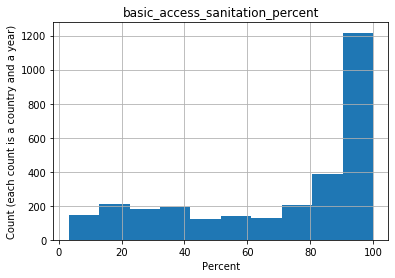

In [53]:
final_table.hist('basic_access_sanitation_percent')
plt.xlabel("Percent")
plt.ylabel("Count (each count is a country and a year)");

It seems like for most years, more countries had a higher percent of population with access to proper sanitation. 
However, there are a few countries with a very low percent of access to sanitation. The descriptive statistics
and the histogram shows that the data is skewed to the left.
Now, I create the time series chart. 

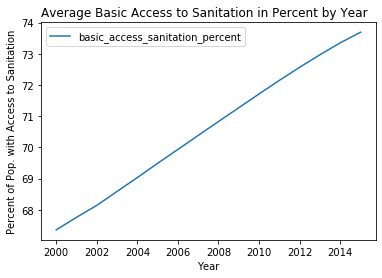

In [54]:
final_table.groupby('year').mean().plot(kind='line',
                                        y=['basic_access_sanitation_percent'])
plt.title("Average Basic Access to Sanitation in Percent by Year", loc='left', fontsize=12, fontweight=0)
plt.xlabel("Year")
plt.ylabel("Percent of Pop. with Access to Sanitation");

From the timeseries chart, the overall global trend for access for sanitation is positive.

## Research Question 2: Which one of the other indicators in this analysis are most correlated with percent access to sanitation in 2000 vs. 2015?

To answer this question, I use scatterplots to see if any of the trends visually look different for the indicators.

In [55]:
#First, create two data frames, one with only data from 2000 and one with only data from 2015
df_00 = final_table.query('year == "2000"')
df_15 = final_table.query('year == "2015"')

In [56]:
#Reset index in the new data frame
df_00.reset_index(inplace = True, drop = True) 

In [57]:
df_00

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears,access_sanitation_level
0,Afghanistan,2000,23.9,27.1,0.340,54.6,687.0,2.90,0.59,Low
1,Albania,2000,88.3,87.6,0.662,74.9,5440.0,9.97,9.87,Moderately High
2,Algeria,2000,83.7,89.8,0.644,74.0,10300.0,6.40,5.50,Medium
3,Andorra,2000,100.0,100.0,0.841,81.2,31700.0,12.50,13.00,High
4,Angola,2000,20.5,37.8,0.391,51.7,3890.0,5.43,3.53,Low
...,...,...,...,...,...,...,...,...,...,...
178,Venezuela,2000,87.3,96.1,0.672,74.0,14600.0,8.50,9.03,Moderately High
179,Vietnam,2000,53.4,77.9,0.576,71.5,2570.0,7.79,7.32,Medium
180,Yemen,2000,41.2,42.7,0.444,63.3,4000.0,5.52,1.26,Low
181,Zambia,2000,26.0,48.6,0.424,46.0,2130.0,7.29,5.74,Low


In [58]:
#Reset index in the new data frame
df_15.reset_index(inplace = True, drop = True) 

In [59]:
df_15

,country,year,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears,access_sanitation_level
0,Afghanistan,2015,39.2,63.0,0.479,61.2,1770.0,4.13,0.98,Low
1,Albania,2015,97.7,91.4,0.764,78.0,11000.0,12.00,12.30,High
2,Algeria,2015,87.5,93.5,0.745,77.1,13800.0,8.52,7.74,Moderately High
3,Andorra,2015,100.0,100.0,0.858,82.6,46600.0,14.30,15.10,High
4,Angola,2015,39.4,41.0,0.533,63.3,6650.0,7.24,5.31,Low
...,...,...,...,...,...,...,...,...,...,...
178,Venezuela,2015,94.9,97.4,0.767,75.0,15600.0,10.50,11.50,Moderately High
179,Vietnam,2015,78.2,91.2,0.683,74.3,5610.0,9.69,9.65,Medium
180,Yemen,2015,59.7,70.4,0.482,68.6,3110.0,7.80,2.35,Medium
181,Zambia,2015,31.1,61.2,0.579,62.0,3680.0,9.11,7.75,Low


In [60]:
#Compare the descriptive statistics for the the two countries
df_00.describe()

,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,67.356227,80.498379,0.625827,67.700546,14039.486339,8.625792,8.003224
std,32.259798,21.514516,0.167630,9.487803,18140.442902,2.846026,3.668537
min,3.150000,16.700000,0.255000,44.300000,573.000000,2.000000,0.590000
25%,38.614286,66.650000,0.479667,61.050000,2665.000000,6.280000,4.900000
50%,80.900000,88.600000,0.656000,71.200000,7360.000000,8.680000,8.620000
75%,96.422222,98.350000,0.754773,74.550000,16200.000000,11.050000,11.100000
max,100.000000,100.000000,0.917000,81.400000,108000.000000,14.000000,14.100000


In [61]:
df_15.describe()

,basic_access_sanitation_percent,basic_access_water_percent,human_dev_index,life_expectancy,income_per_capita,menschool_avgyears,womenschool_avgyears
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,73.690395,86.228205,0.697191,72.336612,17656.196721,10.478634,10.089344
std,29.124939,17.323265,0.154007,7.422606,19068.761836,2.910655,3.956644
min,7.080000,19.300000,0.352000,50.500000,703.000000,2.890000,0.980000
25%,48.600000,77.350000,0.576500,67.100000,3755.000000,8.200000,6.990000
50%,87.500000,94.500000,0.726000,73.500000,11100.000000,10.800000,10.900000
75%,97.650000,98.900000,0.805500,77.950000,25000.000000,12.850000,13.550000
max,100.000000,100.000000,0.949000,84.400000,116000.000000,15.300000,15.700000


In comparing the descriptive statistics above, it can be seen that 2015 has higher values than 2000. Overall, it does 
seem like the distributions are fairly similar.

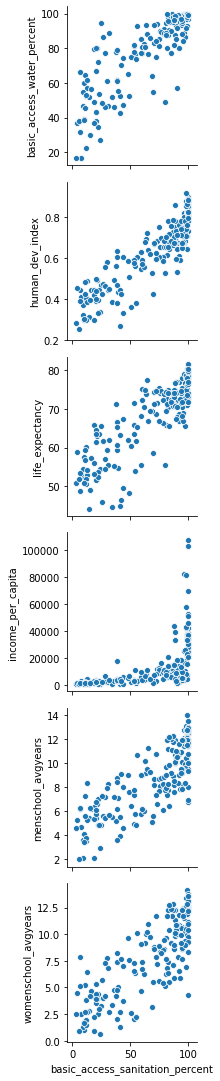

In [62]:
#Create a scatterplot to show correlation between access to the saniation and the other variables for 2000 data frame
sns.pairplot(data = df_00, x_vars = ['basic_access_sanitation_percent'], 
             y_vars = ['basic_access_water_percent','human_dev_index',
                      'life_expectancy','income_per_capita','menschool_avgyears',
                      'womenschool_avgyears']);

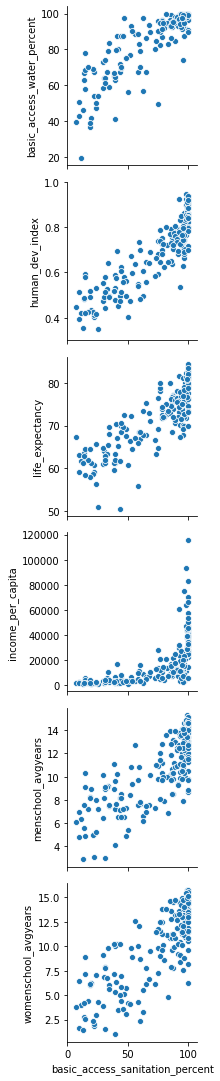

In [63]:
#Create a scatterplot to show correlation between access to the saniation and the other variables for 2015 data frame
sns.pairplot(data = df_15, x_vars = ['basic_access_sanitation_percent'], 
             y_vars = ['basic_access_water_percent','human_dev_index',
                      'life_expectancy','income_per_capita','menschool_avgyears',
                      'womenschool_avgyears']);

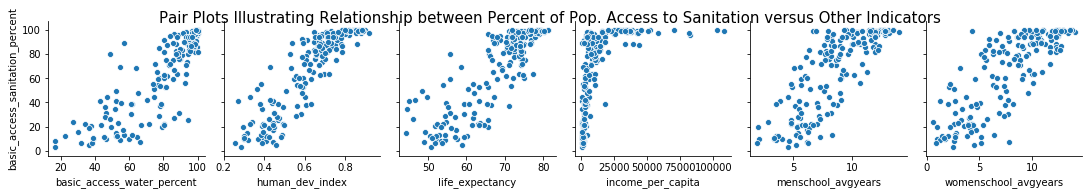

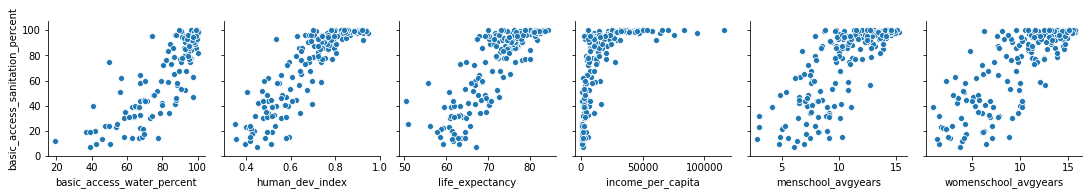

In [64]:
#In order to compare the charts easier I move the percent of access to sanitation to the y axis
sns.pairplot(data = df_00, x_vars = ['basic_access_water_percent','human_dev_index',
                      'life_expectancy','income_per_capita','menschool_avgyears',
                      'womenschool_avgyears'], 
             y_vars = ['basic_access_sanitation_percent'])
plt.suptitle('Pair Plots Illustrating Relationship between Percent of Pop. Access to Sanitation versus Other Indicators',
            size = 15)
sns.pairplot(data = df_15, x_vars = ['basic_access_water_percent','human_dev_index',
                      'life_expectancy','income_per_capita','menschool_avgyears',
                      'womenschool_avgyears'], 
             y_vars = ['basic_access_sanitation_percent']);

In observing the charts above, it seems like the trends are similar in 2000 as compared to 2015.

## Research Question 3: What is the relationship between the number of years of school for men vs women and the level of sanitation in a country?

For this question, the analysis performs a few investigations to understand what is going on and to figure out how to respond to the question. The main chart to respond to the question is a bar chart illustrating the average years of schooling for men and women grouped by the level of access to sanitation.

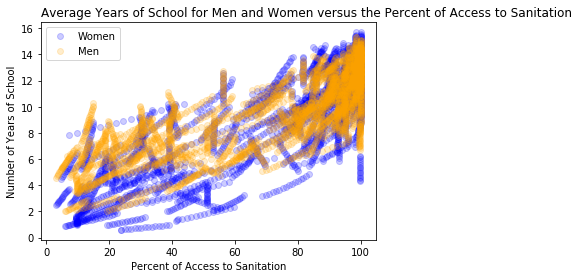

In [65]:
p1 = plt.plot('basic_access_sanitation_percent','womenschool_avgyears',
         data=final_table,linestyle='none', marker='o',alpha = 0.20,color='blue')
p2 = plt.plot('basic_access_sanitation_percent','menschool_avgyears',
         data=final_table,linestyle='none', marker='o',alpha = 0.20,color='orange')
plt.legend((p1[0], p2[0]), ('Women', 'Men'))
plt.title("Average Years of School for Men and Women versus the Percent of Access to Sanitation",
          loc='left', fontsize=12, fontweight=0)
plt.xlabel("Percent of Access to Sanitation")
plt.ylabel("Number of Years of School");

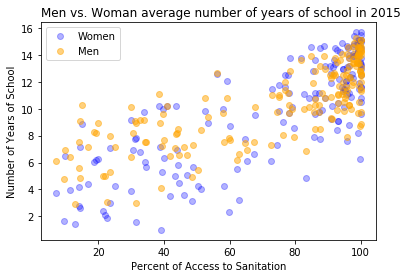

In [66]:
#The scatterplot above give us an indication that the relationship is similar, but it is pretty messy.
#To better understand, I will pick one moment in time, the year 2015. I will use the df_15 that was created for 
#investigating the second question.

p1 = plt.plot('basic_access_sanitation_percent','womenschool_avgyears',
         data=df_15,linestyle='none', marker='o',alpha = 0.30,color='blue')
p2 = plt.plot('basic_access_sanitation_percent','menschool_avgyears',
         data=df_15,linestyle='none', marker='o',alpha = 0.50,color='orange')
plt.legend((p1[0], p2[0]), ('Women', 'Men'))
plt.title("Men vs. Woman average number of years of school in 2015", loc='left', fontsize=12, fontweight=0)
plt.xlabel("Percent of Access to Sanitation")
plt.ylabel("Number of Years of School");

The scatterplot above showing only 2015 is easier to see, and there is distinction between men and women 
for average number of years of school in relation to the percent of access to sanitation. There are more countries with men having on average more years of education in countries with less access to sanitation, while 
more countries near and at 100% of access to proper sanitation women have more mean years of 
education.

In [67]:
#Check the descriptive statistics to see how men mean years of schooling compares to women mean years of schooling.
df_15[['menschool_avgyears','womenschool_avgyears']].describe()

,menschool_avgyears,womenschool_avgyears
count,183.000000,183.000000
mean,10.478634,10.089344
std,2.910655,3.956644
min,2.890000,0.980000
25%,8.200000,6.990000
50%,10.800000,10.900000
75%,12.850000,13.550000
max,15.300000,15.700000


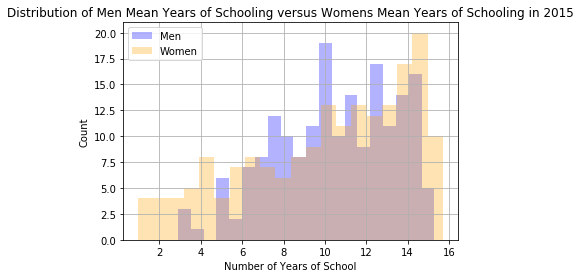

In [68]:
#The statistics above seem to indicate that women do have the lowest amount of mean years of education
#while also having the highest amount of mean years of education.
#The next step will be to see the distribution visually.
df_15['menschool_avgyears'].hist(alpha=0.3,bins=20,label='Men',color='blue')
df_15['womenschool_avgyears'].hist(alpha=0.3,bins=20,label='Women',color='orange')
plt.title('Distribution of Men Mean Years of Schooling versus Womens Mean Years of Schooling in 2015')
plt.legend()
plt.xlabel("Number of Years of School")
plt.ylabel("Count");

The chart agrees that the average years of women having education is both lower and higher
than what men's average years of school are, since this is more centered in the middle of the histogram.
However, the chart only shows the distribution comparison between men and women mean years of schooling, 
and want to include the percent of access to sanitation in this analysis. For the next chart, I use the column 
created in the data preparation to show the level of access to sanitation to buckets (low, medium, 
moderately high, high) based on the descriptive statistics.

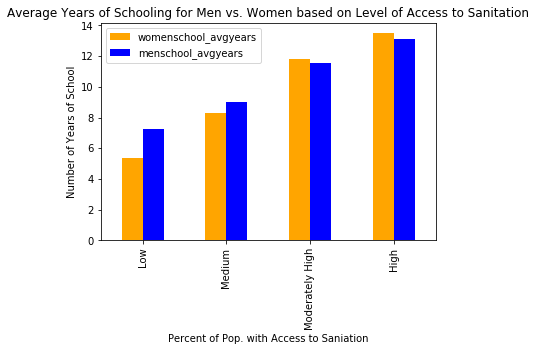

In [69]:
#This chart is a bar graph showing the mean number of years of schooling for men versus women grouped by 
#level of access to sanitation.
df_15.groupby('access_sanitation_level').mean().plot(kind='bar',
                                        y=['womenschool_avgyears','menschool_avgyears'],
                                                     color=['orange','blue'])
plt.title('Average Years of Schooling for Men vs. Women based on Level of Access to Sanitation')
plt.xlabel('Percent of Pop. with Access to Saniation')
plt.ylabel('Number of Years of School');

The chart above shows that at lower sanitation levels, women have less number of years of school on average, 
however, women have more years of school on average when the level of the population to sanitation is higher.

<a id='conclusions'></a>
## Conclusions

In conclusion, there were some interesting findings from the analysis. The questions were essentially about what the overall global trend of proper sanitation infrastructure was from 2000 - 2015, whether the relationships between access to proper sanitation and the other indicators similar in 2000 versus 2015, and what is the relationship between the number of school years for men and for women with the level of proper sanitation in a country. The analysis indicated that the trend of the overall global trend of proper sanitation has been positive around the world, and the level of sanitation has increased on average during this time period. Comparing a few scatter plots to investigate the relationship between the percent of access to sanitation infrastructure and the other indicators seemed to stipulate that the trends are very similar in 2015 as to what they were in 2010. This is a limited view and there could be more minute changes in the trends but this is a very high level analysis. The next analysis showed that on average, in 2015, amount of years of schooling for women was lower than that of men where access to sanitation was low and medium but women had higher years of school than men when there was a moderately high or high level of access to sanitation. 

Some limitations of the overall study were:
 1. Populating the nulls with the mean for the country is still a proxy.
 2. The the calculation for the level of access to sanitation was performed at the total data set level instead of specific for different years. 
 3. The analysis only stays at a higher level and does not evaluate any specific country level data.

Code was inspired by various examples in:
 <a href="https://wesmckinney.com/pages/book.html">Python for Data Analysis</a>,
 <a href="https://pandas.pydata.org/docs/">Pandas Documentation</a> , 
 <a href="https://python-graph-gallery.com/">The Python Graph Gallery</a>. 